# UK Food CPI (MoM%) Forecast


## Project Summary

This Analysis utilizes the **UK Consumer Price Index (CPI) - Food and Non-Alcoholic Beverages** monthly rae time series. The data was cleaned and **EDA** performed on it, to give a **short-term predicion** using some selected models **(Naive, Seasonal-Naive, SARIMA,** and **Prophet).**
Prediction outputs would be saved and visualized in **Streamlit** app.

## Skills Demonstrated 
- Data Cleaning (Using Official statistics/monhly time series)
- Exploratory Data Analysis **(EDA).**
- Prediction **(Naive, Seasonal, SARIMA,** and **Prophet)**
- Model evaluation **(MAPE, RSME)**
- Logical communication and thinking ()

## Function Declaration

In [79]:
# Importing neccessary libraries
import pandas as pd, numpy as np
import re
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [50]:
def load_csv_file(file_path, col_names=['label', 'value'], header_row=0, preview_rows=10):
    """
    Loads a CSV file into a pandas DataFrame with chosen column names and preview.

    Parameters:
    - file_path (str): The path of the CSV file.
    - col_names (list): Column names to assign to the DataFrame.
    - header_row (int): Row number to treat as header (0 = first row).
    - preview_rows (int): Number of rows to print for preview.

    Returns:
    - pd.DataFrame: Loaded DataFrame.
    """
    df = pd.read_csv(file_path, names=col_names, header=header_row)
    print(df.head(preview_rows))
    return df


## 1) Load and clean the dataset to a straightforward data for usability purpose

The dataset will be cleaned and saved into a new CSV file to avoid alteration of the original dataset. The new CSV file will contain date (in proper formats), category and value(MoM%) for the **UK Consumer Price Index (CPI) - Food and Non-Alcoholic Beverages.**

In [51]:
# Loads the original data
df_original = load_csv_file("series-270925.csv")

               label            value
0               CDID             D7JH
1  Source dataset ID             MM23
2            PreUnit              NaN
3               Unit                %
4       Release date       17-09-2025
5       Next release  22 October 2025
6    Important notes              NaN
7           1988 FEB              0.6
8           1988 MAR              0.3
9           1988 APR              0.6


In [52]:
# The re(regex) module is used to ge rows that matches the YYY MON format
mask = df_original['label'].str.match(r"^\d{4}\s+[A-Z]{3}$", na = False) 

# Gets the first index that starts with he proper required data
first_idx = mask.idxmax()
print (f'First index data row = row {first_idx}')

# The work dataframe starts from there
cpi_data = df_original.loc[first_idx:].copy()

First index data row = row 7


In [53]:
# The date column is cleaned using the following code
cpi_data['date'] = pd.to_datetime(cpi_data['label'], format='%Y %b')

# The value column is coverted to a numeric format
cpi_data['value'] = pd.to_numeric(cpi_data['value'], errors = 'coerce')

# The odd column attributes labels are dropped
cpi_data = cpi_data.drop(columns = ['label'])

In [54]:
# A new labelling will be inputed to clarify what these series represent
cpi_data['category'] = 'Consumer Food (MoM%)'

# Columns are re arranged to a standard usable format
cpi_data = cpi_data[['date', 'category', 'value']]

# Rows index are sorted by date
cpi_data = cpi_data.sort_values('date').reset_index(drop = True)

In [55]:
# A new labelling will be inputed to clarify what these series represent
output_path = 'cleaned_cpi.csv'
cpi_data.to_csv(output_path, index = False)

print (f'Cleaning Completed and saved as, {output_path}')

Cleaning Completed and saved as, cleaned_cpi.csv


In [56]:
cleaned_cpi = load_csv_file("cleaned_cpi.csv", col_names=["date", "category", "value"])

         date              category  value
0  1988-02-01  Consumer Food (MoM%)    0.6
1  1988-03-01  Consumer Food (MoM%)    0.3
2  1988-04-01  Consumer Food (MoM%)    0.6
3  1988-05-01  Consumer Food (MoM%)    0.3
4  1988-06-01  Consumer Food (MoM%)    0.2
5  1988-07-01  Consumer Food (MoM%)   -0.9
6  1988-08-01  Consumer Food (MoM%)    0.5
7  1988-09-01  Consumer Food (MoM%)    0.4
8  1988-10-01  Consumer Food (MoM%)    0.2
9  1988-11-01  Consumer Food (MoM%)    0.7


## 2) Exploratory Data Analysis

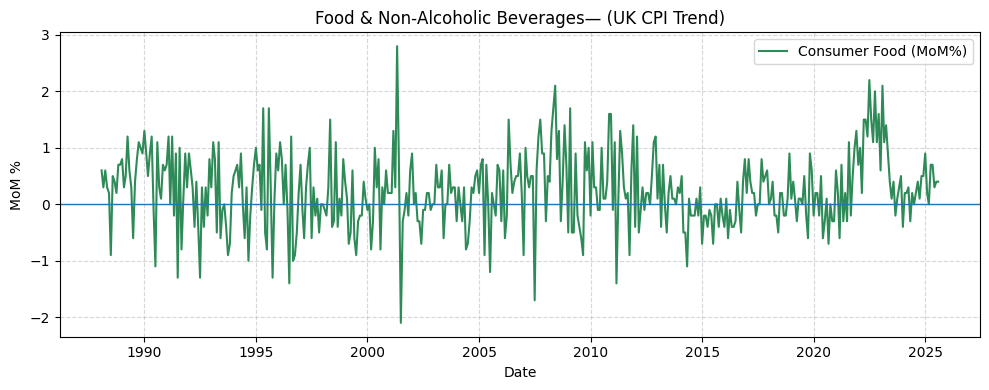

In [73]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(cpi_data['date'], cpi_data['value'], color = 'seagreen', label=cpi_data['category'].iloc[0])
ax.axhline(0, linewidth=1)
ax.set_title('Food & Non‑Alcoholic Beverages— (UK CPI Trend)')
ax.set_xlabel('Date')
ax.set_ylabel('MoM %')
# Grid for readability
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

In [75]:
# 2.2 Recent (last 12 months) summary
recent = cpi_data.tail(12)
print(f'Last 12 months mean%: {round(recent['value'].mean(), 3)}')
print(f'Last 12 months std. dev.: {round(recent['value'].std(), 3)}')
recent.tail()

Last 12 months mean%: 0.425
Last 12 months std. dev.: 0.26


,date,category,value
446,2025-04-01,Consumer Food (MoM%),0.7
447,2025-05-01,Consumer Food (MoM%),0.7
448,2025-06-01,Consumer Food (MoM%),0.3
449,2025-07-01,Consumer Food (MoM%),0.4
450,2025-08-01,Consumer Food (MoM%),0.4


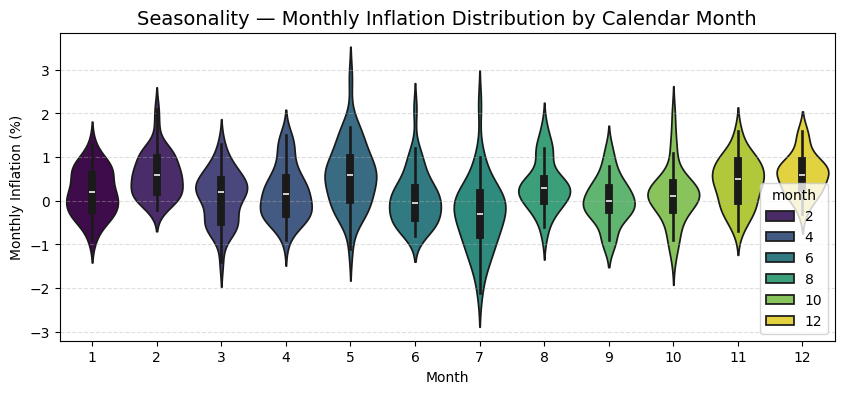

In [89]:
# 2.3 Seasonality glance: distribution by month
cpi_data['month'] = cpi_data['date'].dt.month

plt.figure(figsize=(10,4))
sns.violinplot(x='month', y='value', data=cpi_data, inner='box', hue = 'month', palette='viridis')

plt.title('Seasonality — Monthly Inflation Distribution by Calendar Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Monthly Inflation (%)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()